ਇਸ ਵਿੱਚ 3 ਸਾਲਾਂ (2012 ਤੋਂ 2014) ਦੇ ਘੰਟਾਵਾਰ ਬਿਜਲੀ ਲੋਡ ਅਤੇ ਤਾਪਮਾਨ ਦੇ ਡਾਟਾ ਸ਼ਾਮਲ ਹਨ। ਟਾਸਕ ਭਵਿੱਖ ਵਿੱਚ ਬਿਜਲੀ ਲੋਡ ਦੇ ਮੁੱਲਾਂ ਦੀ ਪੇਸ਼ਗੋਈ ਕਰਨਾ ਹੈ। ਇਸ ਉਦਾਹਰਨ ਵਿੱਚ, ਅਸੀਂ ਸਿਰਫ ਇਤਿਹਾਸਕ ਲੋਡ ਡਾਟਾ ਦੀ ਵਰਤੋਂ ਕਰਦੇ ਹੋਏ ਇੱਕ ਸਮੇਂ ਦੇ ਕਦਮ ਦੀ ਪੇਸ਼ਗੋਈ ਕਰਨ ਦਾ ਤਰੀਕਾ ਦਿਖਾਉਂਦੇ ਹਾਂ।

ਤਾਓ ਹੋਂਗ, ਪੀਅਰ ਪਿੰਸਨ, ਸ਼ੂ ਫੈਨ, ਹਾਮਿਦਰੇਜ਼ਾ ਜ਼ਰੇਪੂਰ, ਅਲਬਰਟੋ ਟਰੋਕੋਲੀ ਅਤੇ ਰੌਬ ਜੇ. ਹਾਈਂਡਮੈਨ, "ਸੰਭਾਵਨਾਤਮਕ ਊਰਜਾ ਪੇਸ਼ਗੋਈ: ਗਲੋਬਲ ਐਨਰਜੀ ਫੋਰਕਾਸਟਿੰਗ ਮੁਕਾਬਲਾ 2014 ਅਤੇ ਅੱਗੇ", ਇੰਟਰਨੈਸ਼ਨਲ ਜਰਨਲ ਆਫ ਫੋਰਕਾਸਟਿੰਗ, ਵੌਲ.32, ਨੰ.3, ਪੰਨਾ 896-913, ਜੁਲਾਈ-ਸਤੰਬਰ, 2016।


## ਲੋੜੀਂਦੇ ਡਿਪੈਂਡੈਂਸੀਜ਼ ਇੰਸਟਾਲ ਕਰੋ  
ਕੁਝ ਲੋੜੀਂਦੇ ਡਿਪੈਂਡੈਂਸੀਜ਼ ਇੰਸਟਾਲ ਕਰਕੇ ਸ਼ੁਰੂ ਕਰੋ। ਹੇਠਾਂ ਦਿੱਤੀਆਂ ਲਾਇਬ੍ਰੇਰੀਆਂ ਅਤੇ ਉਨ੍ਹਾਂ ਦੇ ਵਰਜਨ ਹੱਲ ਲਈ ਕੰਮ ਕਰਨ ਲਈ ਜਾਣੇ ਜਾਂਦੇ ਹਨ:

* `statsmodels == 0.12.2`  
* `matplotlib == 3.4.2`  
* `scikit-learn == 0.24.2`  


In [16]:
!pip install statsmodels

/bin/sh: pip: command not found


In [17]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from common.utils import load_data, mape
from IPython.display import Image

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore") # specify to ignore warning messages


In [18]:
energy = load_data('./data')[['load']]
energy.head(10)

load
2012-01-01 00:00:00 2,698.00
2012-01-01 01:00:00 2,558.00
2012-01-01 02:00:00 2,444.00
2012-01-01 03:00:00 2,402.00
2012-01-01 04:00:00 2,403.00
2012-01-01 05:00:00 2,453.00
2012-01-01 06:00:00 2,560.00
2012-01-01 07:00:00 2,719.00
2012-01-01 08:00:00 2,916.00
2012-01-01 09:00:00 3,105.00

ਜਨਵਰੀ 2012 ਤੋਂ ਦਸੰਬਰ 2014 ਤੱਕ ਸਾਰਾ ਉਪਲਬਧ ਲੋਡ ਡਾਟਾ ਪਲਾਟ ਕਰੋ।


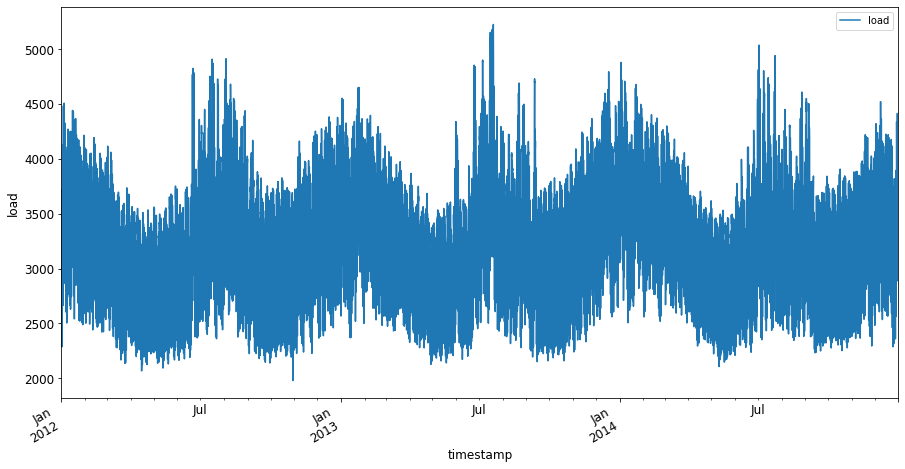

In [19]:
energy.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

## ਟ੍ਰੇਨਿੰਗ ਅਤੇ ਟੈਸਟਿੰਗ ਡਾਟਾ ਸੈਟ ਬਣਾਓ

### ਟ੍ਰੇਨਿੰਗ ਅਤੇ ਟੈਸਟਿੰਗ ਡਾਟਾ ਸੈਟ ਦੀ ਮਹੱਤਤਾ
ਮਸ਼ੀਨ ਲਰਨਿੰਗ ਮਾਡਲਾਂ ਦੀ ਸਹੀ ਤਰ੍ਹਾਂ ਟੈਸਟਿੰਗ ਅਤੇ ਟ੍ਰੇਨਿੰਗ ਕਰਨ ਲਈ, ਸਹੀ ਤਰ੍ਹਾਂ ਵੰਡੇ ਹੋਏ ਡਾਟਾ ਸੈਟ ਦੀ ਲੋੜ ਹੁੰਦੀ ਹੈ। ਇਹ ਮਾਡਲ ਦੀ ਪ੍ਰਦਰਸ਼ਨਸ਼ੀਲਤਾ ਨੂੰ ਸੁਨਿਸ਼ਚਿਤ ਕਰਦਾ ਹੈ ਅਤੇ ਇਹ ਯਕੀਨੀ ਬਣਾਉਂਦਾ ਹੈ ਕਿ ਮਾਡਲ ਨਵਾਂ ਡਾਟਾ ਸਹੀ ਤਰ੍ਹਾਂ ਸੰਭਾਲ ਸਕਦਾ ਹੈ।

### ਡਾਟਾ ਸੈਟ ਵੰਡਣ ਲਈ ਕਦਮ
1. **ਡਾਟਾ ਨੂੰ ਸਮਝੋ**  
   ਪਹਿਲਾਂ, ਡਾਟਾ ਦੇ ਪੈਟਰਨ ਅਤੇ ਵਿਸ਼ੇਸ਼ਤਾਵਾਂ ਨੂੰ ਸਮਝੋ। ਇਹ ਤੁਹਾਨੂੰ ਵੰਡਣ ਦੀ ਯੋਜਨਾ ਬਣਾਉਣ ਵਿੱਚ ਮਦਦ ਕਰੇਗਾ।

2. **ਡਾਟਾ ਨੂੰ ਵੰਡੋ**  
   ਡਾਟਾ ਨੂੰ ਟ੍ਰੇਨਿੰਗ ਅਤੇ ਟੈਸਟਿੰਗ ਸੈਟ ਵਿੱਚ ਵੰਡੋ। ਆਮ ਤੌਰ 'ਤੇ, 70-80% ਡਾਟਾ ਟ੍ਰੇਨਿੰਗ ਲਈ ਅਤੇ 20-30% ਡਾਟਾ ਟੈਸਟਿੰਗ ਲਈ ਵਰਤਿਆ ਜਾਂਦਾ ਹੈ।

3. **ਵਰਤੋਂ ਕਰੋ @@INLINE_CODE_1@@**  
   @@INLINE_CODE_1@@ ਵਰਤ ਕੇ, ਤੁਸੀਂ ਡਾਟਾ ਨੂੰ ਸਹੀ ਤਰ੍ਹਾਂ ਵੰਡ ਸਕਦੇ ਹੋ। ਇਹ ਫੰਕਸ਼ਨ ਤੁਹਾਡੇ ਡਾਟਾ ਨੂੰ ਰੈਂਡਮ ਤੌਰ 'ਤੇ ਵੰਡਦਾ ਹੈ।

### ਉਦਾਹਰਨ
```python
# ਡਾਟਾ ਨੂੰ ਟ੍ਰੇਨਿੰਗ ਅਤੇ ਟੈਸਟਿੰਗ ਸੈਟ ਵਿੱਚ ਵੰਡੋ
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

[!NOTE] ਇਹ ਯਕੀਨੀ ਬਣਾਓ ਕਿ ਤੁਸੀਂ `random_state` ਨੂੰ ਸੈਟ ਕਰਦੇ ਹੋ ਤਾਂ ਜੋ ਨਤੀਜੇ ਦੁਹਰਾਏ ਜਾ ਸਕਣ।

### ਸਹੀ ਵੰਡਣ ਦੀ ਮਹੱਤਤਾ
- **ਮਾਡਲ ਦੀ ਸਹੀਤਾ**: ਸਹੀ ਵੰਡਣ ਨਾਲ ਮਾਡਲ ਨੂੰ ਸਹੀ ਤਰ੍ਹਾਂ ਟੈਸਟ ਕੀਤਾ ਜਾ ਸਕਦਾ ਹੈ।  
- **ਓਵਰਫਿਟਿੰਗ ਤੋਂ ਬਚਾਅ**: ਇਹ ਯਕੀਨੀ ਬਣਾਉਂਦਾ ਹੈ ਕਿ ਮਾਡਲ ਸਿਰਫ ਟ੍ਰੇਨਿੰਗ ਡਾਟਾ 'ਤੇ ਹੀ ਨਹੀਂ ਸਿੱਖਦਾ।  
- **ਜਨਰਲਾਈਜ਼ੇਸ਼ਨ**: ਮਾਡਲ ਨੂੰ ਨਵਾਂ ਡਾਟਾ ਸਹੀ ਤਰ੍ਹਾਂ ਸੰਭਾਲਣ ਦੀ ਯੋਗਤਾ ਦਿੰਦਾ ਹੈ।

### ਸਾਰ
ਡਾਟਾ ਸੈਟ ਨੂੰ ਸਹੀ ਤਰ੍ਹਾਂ ਵੰਡਣਾ ਮਸ਼ੀਨ ਲਰਨਿੰਗ ਮਾਡਲਾਂ ਦੀ ਸਫਲਤਾ ਲਈ ਬਹੁਤ ਜ਼ਰੂਰੀ ਹੈ। ਸਹੀ ਤਰੀਕੇ ਨਾਲ ਵੰਡਿਆ ਗਿਆ ਡਾਟਾ ਮਾਡਲ ਦੀ ਸਹੀਤਾ ਅਤੇ ਜਨਰਲਾਈਜ਼ੇਸ਼ਨ ਨੂੰ ਸੁਨਿਸ਼ਚਿਤ ਕਰਦਾ ਹੈ।


In [20]:
train_start_dt = '2014-11-01 00:00:00'
test_start_dt = '2014-12-30 00:00:00'    

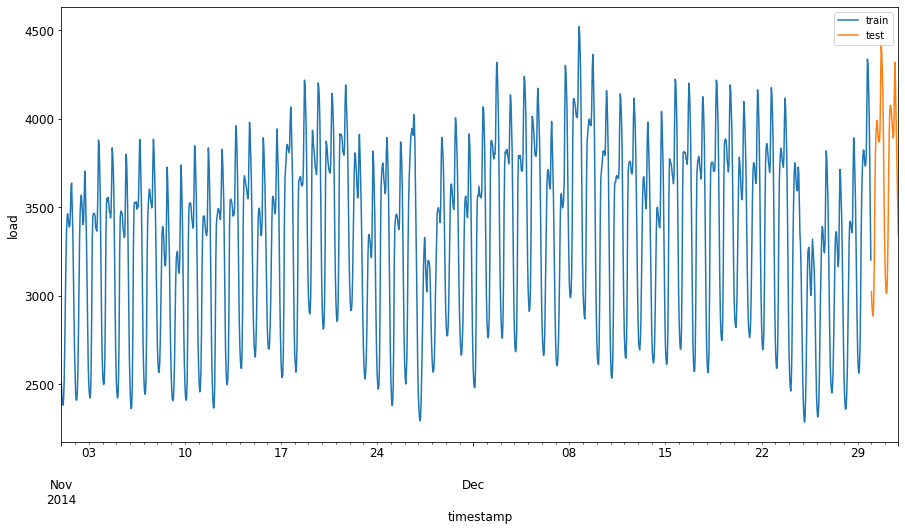

In [21]:
energy[(energy.index < test_start_dt) & (energy.index >= train_start_dt)][['load']].rename(columns={'load':'train'}) \
    .join(energy[test_start_dt:][['load']].rename(columns={'load':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [22]:
train = energy.copy()[(energy.index >= train_start_dt) & (energy.index < test_start_dt)][['load']]
test = energy.copy()[energy.index >= test_start_dt][['load']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (1416, 1)
Test data shape:  (48, 1)


In [23]:
scaler = MinMaxScaler()
train['load'] = scaler.fit_transform(train)
train.head(10)

load
2014-11-01 00:00:00  0.10
2014-11-01 01:00:00  0.07
2014-11-01 02:00:00  0.05
2014-11-01 03:00:00  0.04
2014-11-01 04:00:00  0.06
2014-11-01 05:00:00  0.10
2014-11-01 06:00:00  0.19
2014-11-01 07:00:00  0.31
2014-11-01 08:00:00  0.40
2014-11-01 09:00:00  0.48

ਅਸਲ ਵਿਰੁੱਧ ਸਕੇਲ ਡਾਟਾ:


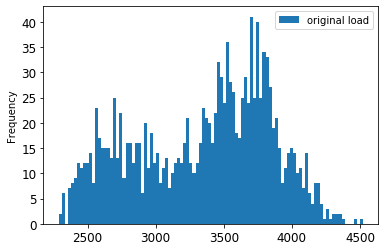

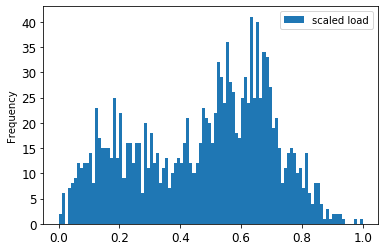

In [24]:
energy[(energy.index >= train_start_dt) & (energy.index < test_start_dt)][['load']].rename(columns={'load':'original load'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={'load':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

ਚਲੋ ਟੈਸਟ ਡਾਟਾ ਨੂੰ ਵੀ ਸਕੇਲ ਕਰੀਏ


In [25]:
test['load'] = scaler.transform(test)
test.head()

load
2014-12-30 00:00:00  0.33
2014-12-30 01:00:00  0.29
2014-12-30 02:00:00  0.27
2014-12-30 03:00:00  0.27
2014-12-30 04:00:00  0.30

In [26]:
# Specify the number of steps to forecast ahead
HORIZON = 3
print('Forecasting horizon:', HORIZON, 'hours')

Forecasting horizon: 3 hours


In [27]:
order = (4, 1, 0)
seasonal_order = (1, 1, 0, 24)

model = SARIMAX(endog=train, order=order, seasonal_order=seasonal_order)
results = model.fit()

print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                               load   No. Observations:                 1416
Model:             SARIMAX(4, 1, 0)x(1, 1, 0, 24)   Log Likelihood                3477.239
Date:                            Thu, 30 Sep 2021   AIC                          -6942.477
Time:                                    14:36:28   BIC                          -6911.050
Sample:                                11-01-2014   HQIC                         -6930.725
                                     - 12-29-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8403      0.016     52.226      0.000       0.809       0.872
ar.L2         -0.5220      0.034   

ਹਰ ਇੱਕ HORIZON ਕਦਮ ਲਈ ਇੱਕ ਟੈਸਟ ਡੇਟਾ ਪੌਇੰਟ ਬਣਾਓ।


In [28]:
test_shifted = test.copy()

for t in range(1, HORIZON):
    test_shifted['load+'+str(t)] = test_shifted['load'].shift(-t, freq='H')
    
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

load  load+1  load+2
2014-12-30 00:00:00  0.33    0.29    0.27
2014-12-30 01:00:00  0.29    0.27    0.27
2014-12-30 02:00:00  0.27    0.27    0.30
2014-12-30 03:00:00  0.27    0.30    0.41
2014-12-30 04:00:00  0.30    0.41    0.57

In [29]:
%%time
training_window = 720 # dedicate 30 days (720 hours) for training

train_ts = train['load']
test_ts = test_shifted

history = [x for x in train_ts]
history = history[(-training_window):]

predictions = list()

# let's user simpler model for demonstration
order = (2, 1, 0)
seasonal_order = (1, 1, 0, 24)

for t in range(test_ts.shape[0]):
    model = SARIMAX(endog=history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    yhat = model_fit.forecast(steps = HORIZON)
    predictions.append(yhat)
    obs = list(test_ts.iloc[t])
    # move the training window
    history.append(obs[0])
    history.pop(0)
    print(test_ts.index[t])
    print(t+1, ': predicted =', yhat, 'expected =', obs)

2014-12-30 00:00:00
1 : predicted = [0.32 0.29 0.28] expected = [0.32945389435989236, 0.2900626678603402, 0.2739480752014323]
2014-12-30 01:00:00
2 : predicted = [0.3  0.29 0.3 ] expected = [0.2900626678603402, 0.2739480752014323, 0.26812891674127126]
2014-12-30 02:00:00
3 : predicted = [0.27 0.28 0.32] expected = [0.2739480752014323, 0.26812891674127126, 0.3025962399283795]
2014-12-30 03:00:00
4 : predicted = [0.28 0.32 0.42] expected = [0.26812891674127126, 0.3025962399283795, 0.40823634735899716]
2014-12-30 04:00:00
5 : predicted = [0.3  0.39 0.54] expected = [0.3025962399283795, 0.40823634735899716, 0.5689346463742166]
2014-12-30 05:00:00
6 : predicted = [0.4  0.55 0.66] expected = [0.40823634735899716, 0.5689346463742166, 0.6799462846911368]
2014-12-30 06:00:00
7 : predicted = [0.57 0.68 0.75] expected = [0.5689346463742166, 0.6799462846911368, 0.7309758281110115]
2014-12-30 07:00:00
8 : predicted = [0.68 0.75 0.8 ] expected = [0.6799462846911368, 0.7309758281110115, 0.75111906893

ਪੇਸ਼ਗੂਆਂ ਨੂੰ ਅਸਲ ਲੋਡ ਨਾਲ ਤੁਲਨਾ ਕਰੋ


In [30]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = test.index[0:len(test.index)-HORIZON+1]
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='h')
eval_df['actual'] = np.array(np.transpose(test_ts)).ravel()
eval_df[['prediction', 'actual']] = scaler.inverse_transform(eval_df[['prediction', 'actual']])
eval_df.head()

timestamp    h  prediction   actual
0 2014-12-30 00:00:00  t+1    3,008.74 3,023.00
1 2014-12-30 01:00:00  t+1    2,955.53 2,935.00
2 2014-12-30 02:00:00  t+1    2,900.17 2,899.00
3 2014-12-30 03:00:00  t+1    2,917.69 2,886.00
4 2014-12-30 04:00:00  t+1    2,946.99 2,963.00

ਸਭ ਪੇਸ਼ਗੂਆਂ 'ਤੇ **ਮੀਨ ਐਬਸੋਲਿਊਟ ਪਰਸੈਂਟੇਜ ਐਰਰ (MAPE)** ਦੀ ਗਣਨਾ ਕਰੋ

$$MAPE = \frac{1}{n} \sum_{t=1}^{n}|\frac{actual_t - predicted_t}{actual_t}|$$


In [31]:
if(HORIZON > 1):
    eval_df['APE'] = (eval_df['prediction'] - eval_df['actual']).abs() / eval_df['actual']
    print(eval_df.groupby('h')['APE'].mean())

h
t+1   0.01
t+2   0.01
t+3   0.02
Name: APE, dtype: float64


In [32]:
print('One step forecast MAPE: ', (mape(eval_df[eval_df['h'] == 't+1']['prediction'], eval_df[eval_df['h'] == 't+1']['actual']))*100, '%')

One step forecast MAPE:  0.5570581332313952 %


In [33]:
print('Multi-step forecast MAPE: ', mape(eval_df['prediction'], eval_df['actual'])*100, '%')

Multi-step forecast MAPE:  1.1460048657704118 %


ਟੈਸਟ ਸੈੱਟ ਦੇ ਪਹਿਲੇ ਹਫ਼ਤੇ ਲਈ ਅਨੁਮਾਨਾਂ ਨੂੰ ਅਸਲਾਂ ਦੇ ਮੁਕਾਬਲੇ ਪਲਾਟ ਕਰੋ


No handles with labels found to put in legend.


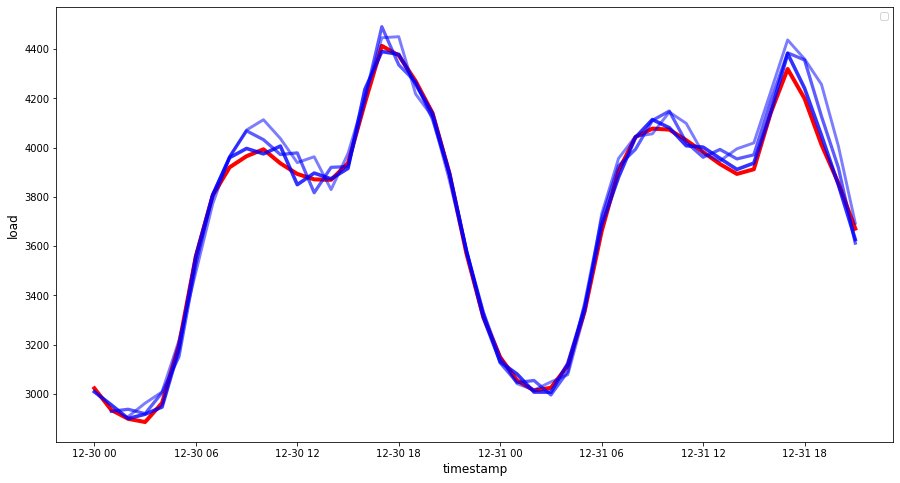

In [34]:
if(HORIZON == 1):
    ## Plotting single step forecast
    eval_df.plot(x='timestamp', y=['actual', 'prediction'], style=['r', 'b'], figsize=(15, 8))

else:
    ## Plotting multi step forecast
    plot_df = eval_df[(eval_df.h=='t+1')][['timestamp', 'actual']]
    for t in range(1, HORIZON+1):
        plot_df['t+'+str(t)] = eval_df[(eval_df.h=='t+'+str(t))]['prediction'].values

    fig = plt.figure(figsize=(15, 8))
    ax = plt.plot(plot_df['timestamp'], plot_df['actual'], color='red', linewidth=4.0)
    ax = fig.add_subplot(111)
    for t in range(1, HORIZON+1):
        x = plot_df['timestamp'][(t-1):]
        y = plot_df['t+'+str(t)][0:len(x)]
        ax.plot(x, y, color='blue', linewidth=4*math.pow(.9,t), alpha=math.pow(0.8,t))
    
    ax.legend(loc='best')
    
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()


---

**ਅਸਵੀਕਤੀ**:  
ਇਹ ਦਸਤਾਵੇਜ਼ AI ਅਨੁਵਾਦ ਸੇਵਾ [Co-op Translator](https://github.com/Azure/co-op-translator) ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਅਨੁਵਾਦ ਕੀਤਾ ਗਿਆ ਹੈ। ਜਦੋਂ ਕਿ ਅਸੀਂ ਸਹੀਤਾ ਲਈ ਯਤਨਸ਼ੀਲ ਹਾਂ, ਕਿਰਪਾ ਕਰਕੇ ਧਿਆਨ ਦਿਓ ਕਿ ਸਵੈਚਾਲਿਤ ਅਨੁਵਾਦਾਂ ਵਿੱਚ ਗਲਤੀਆਂ ਜਾਂ ਅਸੁਚਨਾਵਾਂ ਹੋ ਸਕਦੀਆਂ ਹਨ। ਮੂਲ ਦਸਤਾਵੇਜ਼ ਨੂੰ ਇਸਦੀ ਮੂਲ ਭਾਸ਼ਾ ਵਿੱਚ ਅਧਿਕਾਰਤ ਸਰੋਤ ਮੰਨਿਆ ਜਾਣਾ ਚਾਹੀਦਾ ਹੈ। ਮਹੱਤਵਪੂਰਨ ਜਾਣਕਾਰੀ ਲਈ, ਪੇਸ਼ੇਵਰ ਮਨੁੱਖੀ ਅਨੁਵਾਦ ਦੀ ਸਿਫਾਰਸ਼ ਕੀਤੀ ਜਾਂਦੀ ਹੈ। ਇਸ ਅਨੁਵਾਦ ਦੀ ਵਰਤੋਂ ਤੋਂ ਪੈਦਾ ਹੋਣ ਵਾਲੇ ਕਿਸੇ ਵੀ ਗਲਤਫਹਿਮੀ ਜਾਂ ਗਲਤ ਵਿਆਖਿਆ ਲਈ ਅਸੀਂ ਜ਼ਿੰਮੇਵਾਰ ਨਹੀਂ ਹਾਂ।
